In [47]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
lstm = pd.read_csv('Final.csv')

In [3]:
lstm.sample()

,Date,provincename,Construction,Manufacturing,Transportation,Healthcare,Agriculture,Population,Station Name,Max Temp (°C),Total Snow (cm),Total Precip (mm),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Longitude (x),Latitude (y)
5787,01-04-2021,Alberta,155.196517,76.203033,62.808034,72.993476,281.399554,17189,Stony Plain,17.6,4.063636,0.0,0.6,9.1,8.9,0.0,-114.11,53.55


# Breton Construction 

In [4]:
lstm_construction_breton = lstm['Construction'][lstm['Station Name'] == 'Breton']

In [5]:
lstm_construction_breton.index = pd.to_datetime(lstm_construction_breton.index)

In [6]:
lstm_construction_breton = lstm_construction_breton.to_frame(name='construction')

In [7]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_construction_breton['construction'] = scaler.fit_transform(lstm_construction_breton[['construction']])


In [8]:
lstm_construction_breton['construction'].head()

1970-01-01 00:00:00.000001008    0.020213
1970-01-01 00:00:00.000001009    0.013107
1970-01-01 00:00:00.000001010    0.023948
1970-01-01 00:00:00.000001011    0.010728
1970-01-01 00:00:00.000001012    0.021525
Name: construction, dtype: float64

In [9]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [10]:
sequence_length = 11
X, y = create_sequences(lstm_construction_breton['construction'].values, sequence_length)


In [11]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [12]:
n_steps =11
n_features =1

In [13]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

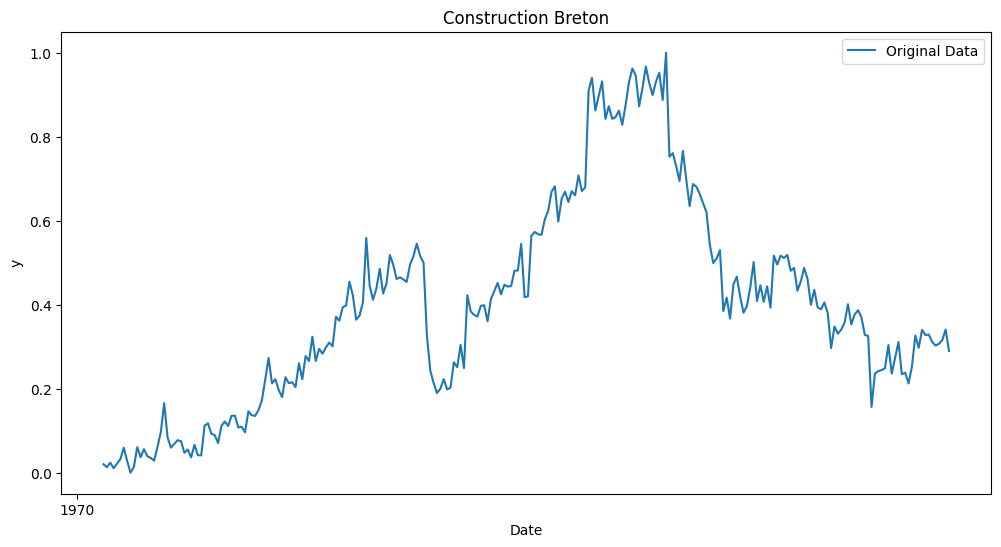

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_construction_breton.index, lstm_construction_breton['construction'], label='Original Data')
plt.title('Construction Breton')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [15]:
#Scaling the data
scaler = MinMaxScaler()
lstm_construction_breton[['construction']] = scaler.fit_transform(lstm_construction_breton[['construction']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_construction_breton) * 0.8)
train, test = lstm_construction_breton[:train_size], lstm_construction_breton[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['construction'].values, sequence_length)
X_test, y_test = create_sequences(test['construction'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 23ms/step


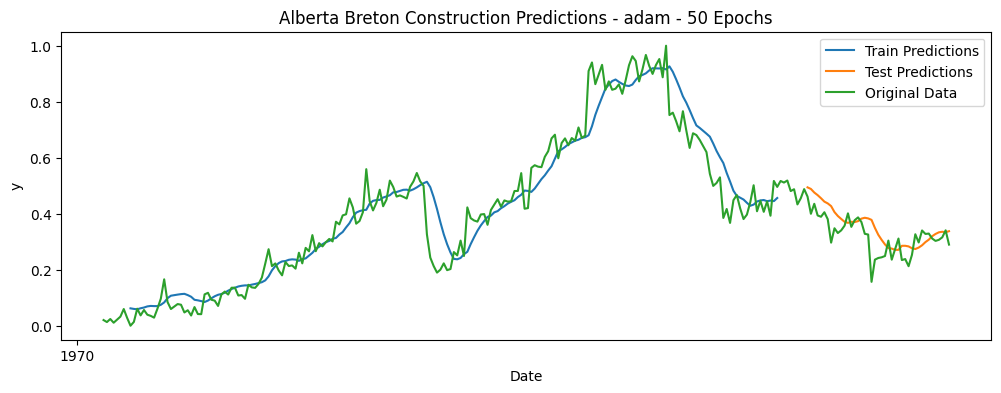

Metrics for adam - 50 Epochs:
Train MSE: 0.13262490307825206
Test MSE: 0.00943361882810698
Train MAE: 0.05057154456289879
Test MAE: 0.04721833213202635
Train RMSE: 0.07186082515833399
Test RMSE: 0.06085276731299842
2/2 [==============================] - 0s 0s/step


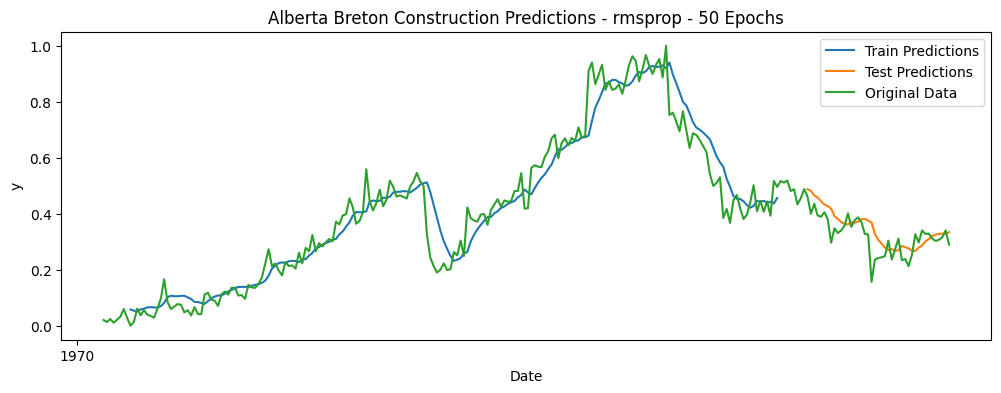

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.13367964963186021
Test MSE: 0.008868788531862555
Train MAE: 0.04734717991134826
Test MAE: 0.042295294813730136
Train RMSE: 0.06679994511680477
Test RMSE: 0.055297965274508185
2/2 [==============================] - 0s 10ms/step


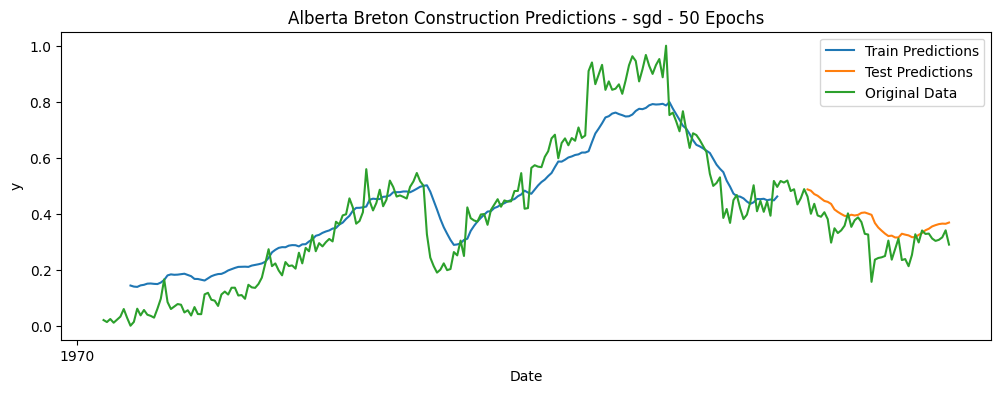

Metrics for sgd - 50 Epochs:
Train MSE: 0.10522384738524557
Test MSE: 0.009933155807793003
Train MAE: 0.0731309652860839
Test MAE: 0.05950179775264628
Train RMSE: 0.09293147151046166
Test RMSE: 0.07384090611108556
2/2 [==============================] - 0s 6ms/step


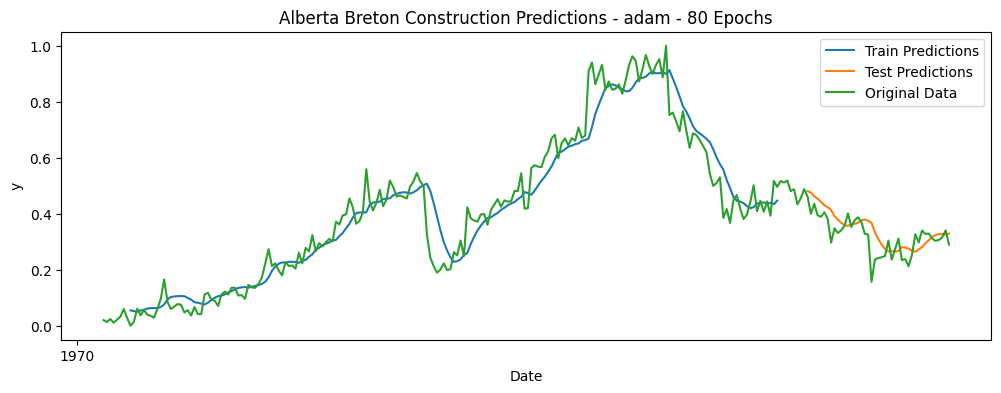

Metrics for adam - 80 Epochs:
Train MSE: 0.1310419105831154
Test MSE: 0.00865516066217082
Train MAE: 0.048109149382893485
Test MAE: 0.0414901802228857
Train RMSE: 0.06782580936382512
Test RMSE: 0.05458705417599857
2/2 [==============================] - 0s 7ms/step


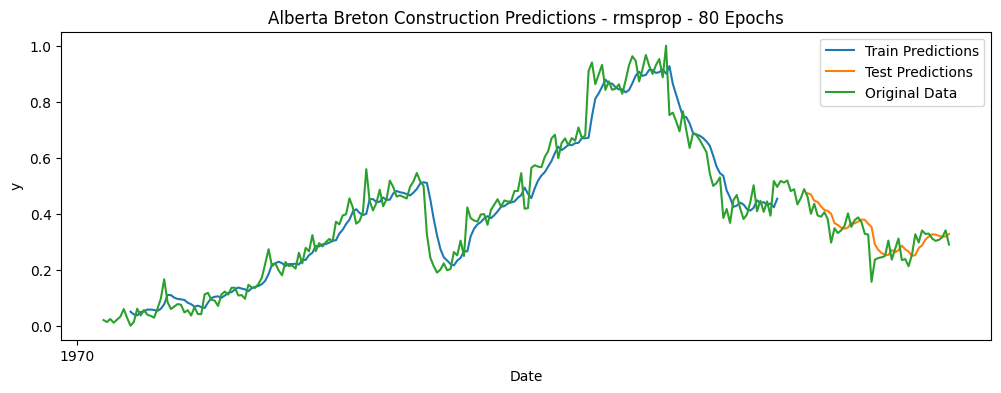

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.1326028851746941
Test MSE: 0.008210307743520058
Train MAE: 0.04191835071579187
Test MAE: 0.03366219718296392
Train RMSE: 0.05882732091080875
Test RMSE: 0.04723082645054627
2/2 [==============================] - 0s 0s/step


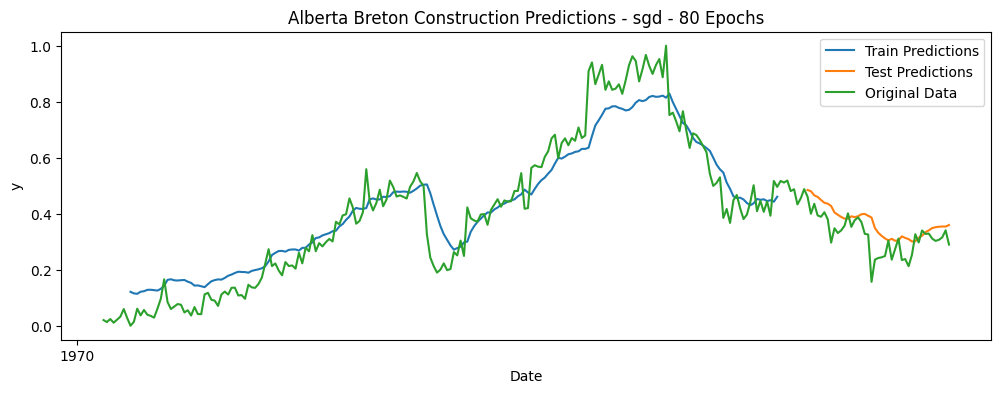

Metrics for sgd - 80 Epochs:
Train MSE: 0.11105648293312775
Test MSE: 0.009239555045515406
Train MAE: 0.06378095716579758
Test MAE: 0.05198535727176054
Train RMSE: 0.08146211800434813
Test RMSE: 0.06619260770239023
2/2 [==============================] - 0s 16ms/step


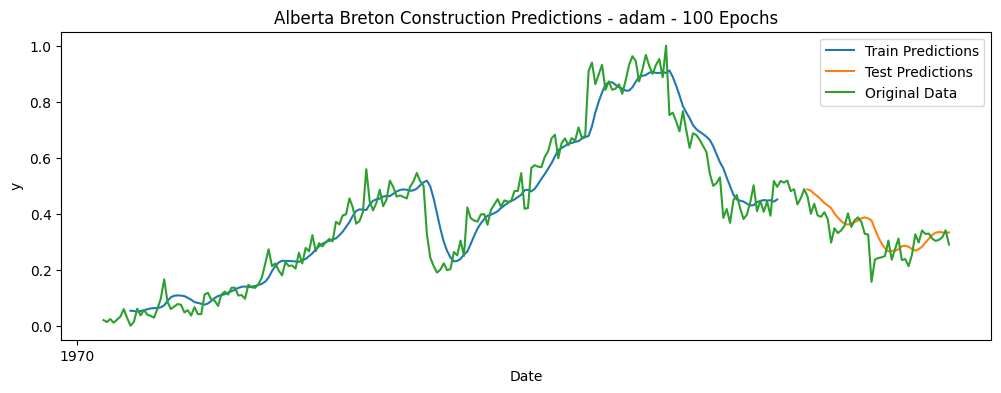

Metrics for adam - 100 Epochs:
Train MSE: 0.13201547142555067
Test MSE: 0.009166802153797211
Train MAE: 0.047637715299949604
Test MAE: 0.04511576373295188
Train RMSE: 0.06799608440439332
Test RMSE: 0.058521717484345655
2/2 [==============================] - 0s 8ms/step


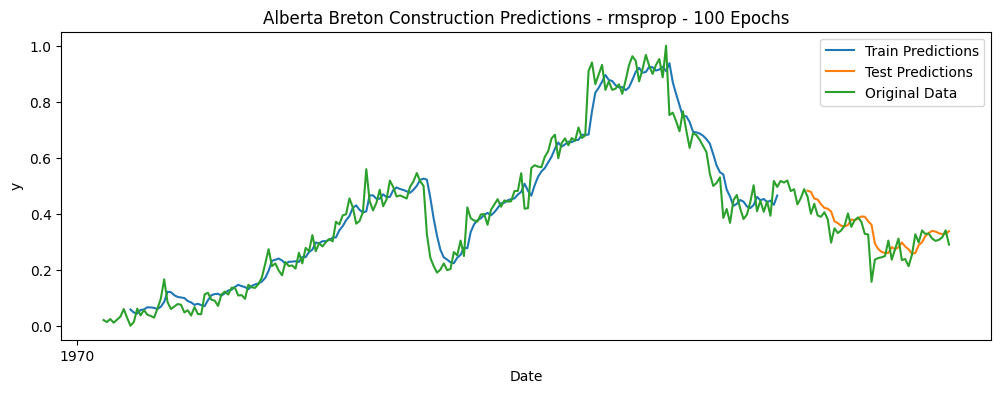

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.13300574472238283
Test MSE: 0.008587418428437946
Train MAE: 0.04113033540601565
Test MAE: 0.036357671860396894
Train RMSE: 0.05765777426486365
Test RMSE: 0.05044751324636955
2/2 [==============================] - 0s 10ms/step


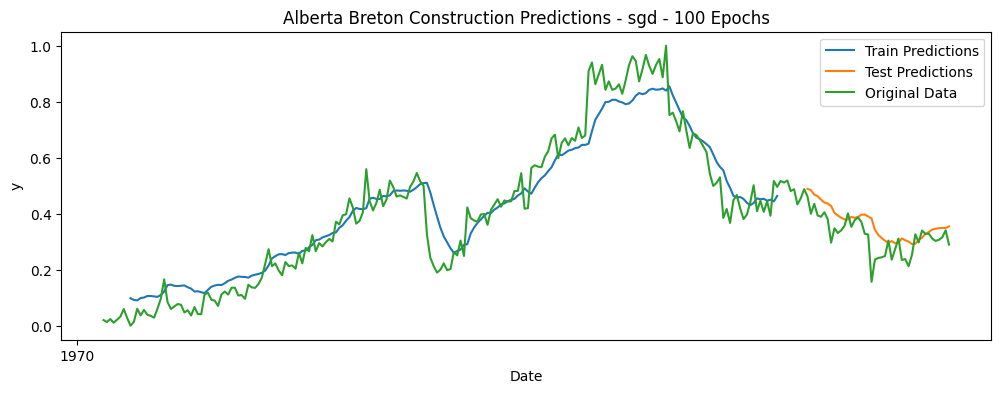

Metrics for sgd - 100 Epochs:
Train MSE: 0.11715966116466572
Test MSE: 0.00926387757307269
Train MAE: 0.0565778510627911
Test MAE: 0.04950439966805756
Train RMSE: 0.07377433028564902
Test RMSE: 0.06363726342233585
2/2 [==============================] - 0s 4ms/step


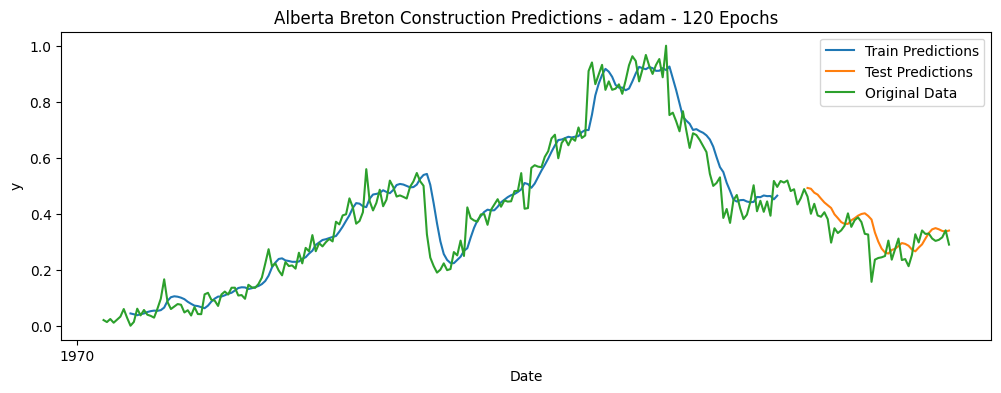

Metrics for adam - 120 Epochs:
Train MSE: 0.13599980055545577
Test MSE: 0.009631245119797884
Train MAE: 0.043163471430208405
Test MAE: 0.04577192669496
Train RMSE: 0.06210033667443748
Test RMSE: 0.059560071738792866
2/2 [==============================] - 0s 0s/step


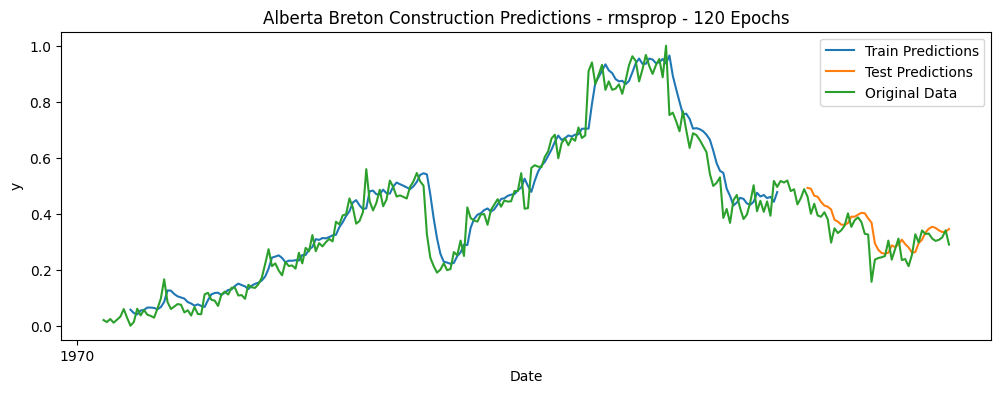

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.1377429465359401
Test MSE: 0.009312396393568128
Train MAE: 0.042402618726927487
Test MAE: 0.04131914193345675
Train RMSE: 0.05918698500265453
Test RMSE: 0.05502279981642287
2/2 [==============================] - 0s 16ms/step


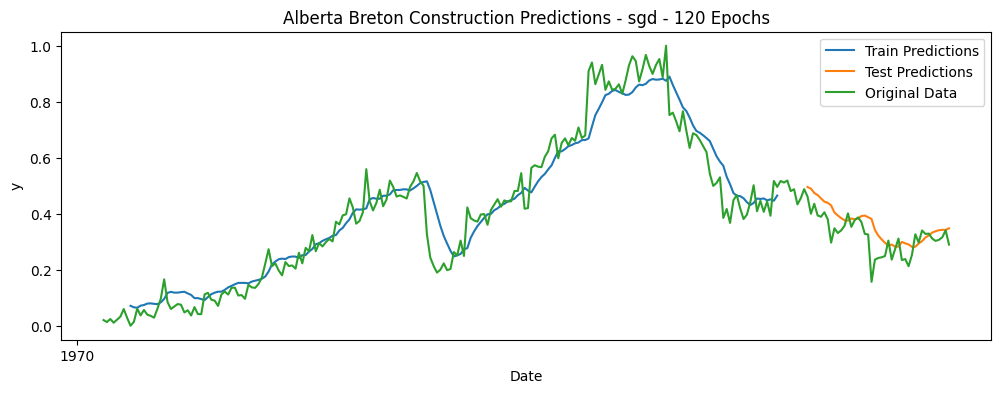

Metrics for sgd - 120 Epochs:
Train MSE: 0.12577053471846472
Test MSE: 0.009477698148581314
Train MAE: 0.050103154830441296
Test MAE: 0.04798553756866959
Train RMSE: 0.06934008597003259
Test RMSE: 0.06207723650656542


In [16]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_construction_breton.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_construction_breton.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_construction_breton.index, lstm_construction_breton['construction'], label='Original Data')
        plt.title(f'Alberta Breton Construction Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['construction'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['construction'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['construction'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['construction'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['construction'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['construction'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

# Stavely Transportation

In [50]:
lstm_transportation_stavely = lstm['Transportation'][lstm['Station Name'] == 'Stavely']

In [18]:
lstm_transportation_stavely.index = pd.to_datetime(lstm_transportation_stavely.index)

In [19]:
lstm_transportation_stavely = lstm_transportation_stavely.to_frame(name='Transportation')

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_transportation_stavely['Transportation'] = scaler.fit_transform(lstm_transportation_stavely[['Transportation']])


In [22]:
lstm_transportation_stavely['Transportation'].head()


1970-01-01 00:00:00.000005292    0.062439
1970-01-01 00:00:00.000005293    0.134910
1970-01-01 00:00:00.000005294    0.123395
1970-01-01 00:00:00.000005295    0.074132
1970-01-01 00:00:00.000005296    0.078088
Name: Transportation, dtype: float64

In [23]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [24]:
sequence_length = 11
X, y = create_sequences(lstm_transportation_stavely['Transportation'].values, sequence_length)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [26]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [27]:
n_steps =11
n_features =1

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [29]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Text(0, 0.5, 'y')

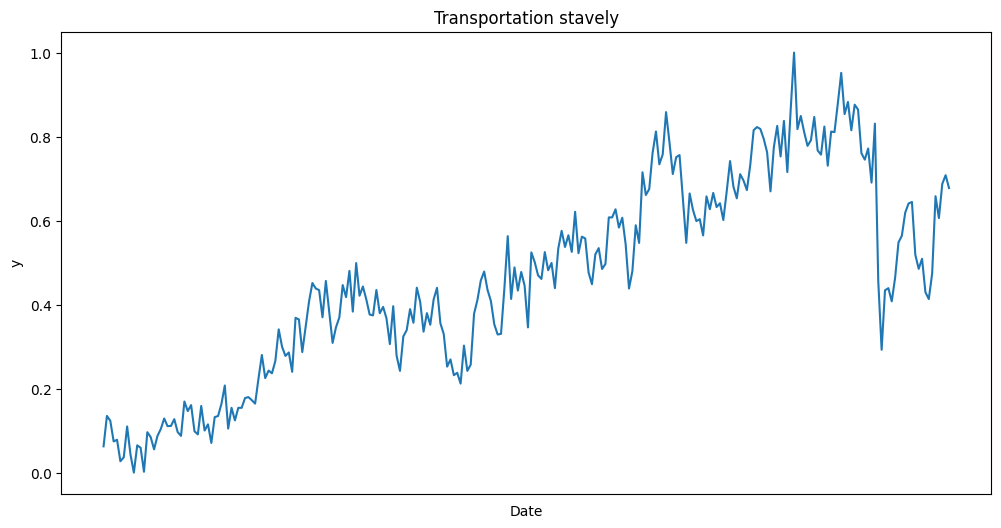

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_transportation_stavely.index, lstm_transportation_stavely['Transportation'], label='Original Data')
plt.title('Transportation stavely')
plt.xlabel('Date')
plt.ylabel('y')

In [31]:
#Scaling the data
scaler = MinMaxScaler()
lstm_transportation_stavely[['Transportation']] = scaler.fit_transform(lstm_transportation_stavely[['Transportation']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_transportation_stavely) * 0.8)
train, test = lstm_transportation_stavely[:train_size], lstm_transportation_stavely[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Transportation'].values, sequence_length)
X_test, y_test = create_sequences(test['Transportation'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 6ms/step


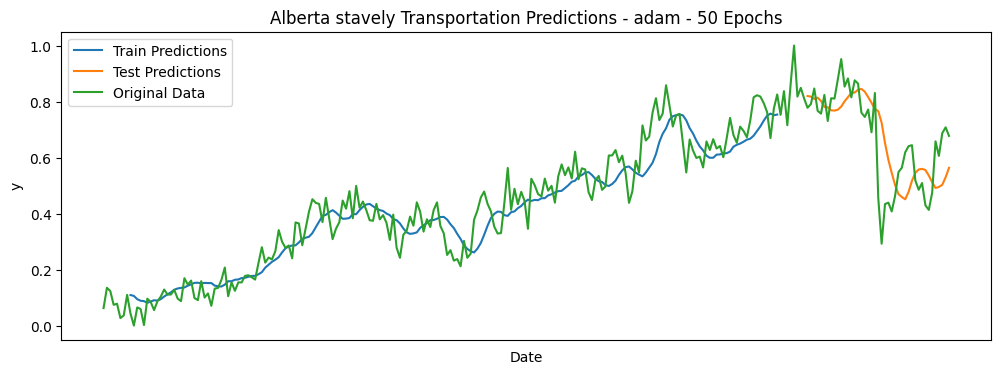

Metrics for adam - 50 Epochs:
Train MSE: 0.07877432125526176
Test MSE: 0.047774201570542366
Train MAE: 0.0534617519390284
Test MAE: 0.1013687643798488
Train RMSE: 0.0688429025656377
Test RMSE: 0.129435311748266
2/2 [==============================] - 0s 16ms/step


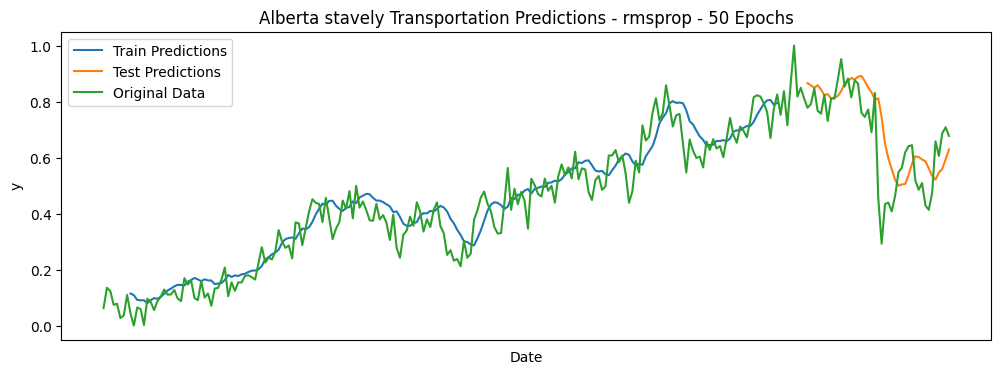

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.08383802912745404
Test MSE: 0.05056543183186981
Train MAE: 0.05154547245805166
Test MAE: 0.09660762727126306
Train RMSE: 0.06589131069300658
Test RMSE: 0.12893929466156487
2/2 [==============================] - 0s 17ms/step


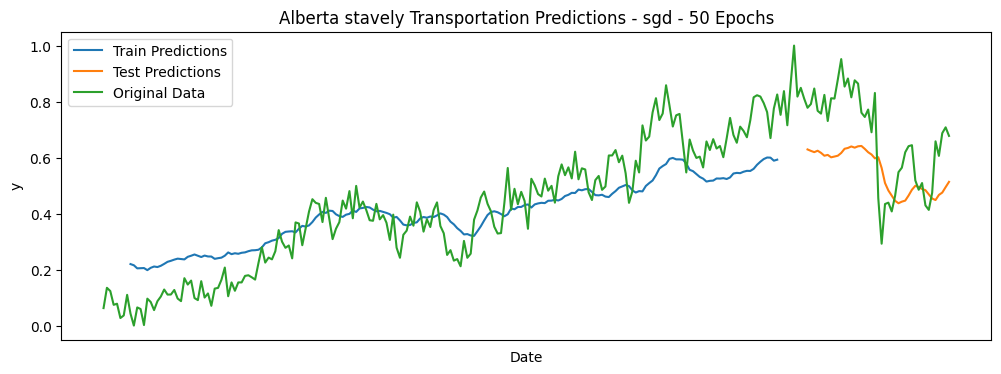

Metrics for sgd - 50 Epochs:
Train MSE: 0.05599364017651356
Test MSE: 0.046939803919941826
Train MAE: 0.09102166563435242
Test MAE: 0.15041746778851342
Train RMSE: 0.10941281751627717
Test RMSE: 0.17019725503330727
2/2 [==============================] - 0s 7ms/step


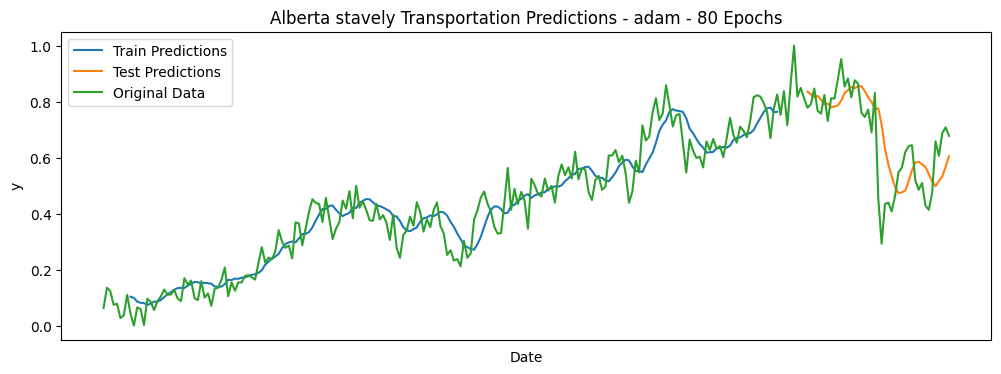

Metrics for adam - 80 Epochs:
Train MSE: 0.08135108232287261
Test MSE: 0.04740952496096361
Train MAE: 0.049306152436442124
Test MAE: 0.09458573639824594
Train RMSE: 0.06373873049796626
Test RMSE: 0.12191977954830255
2/2 [==============================] - 0s 2ms/step


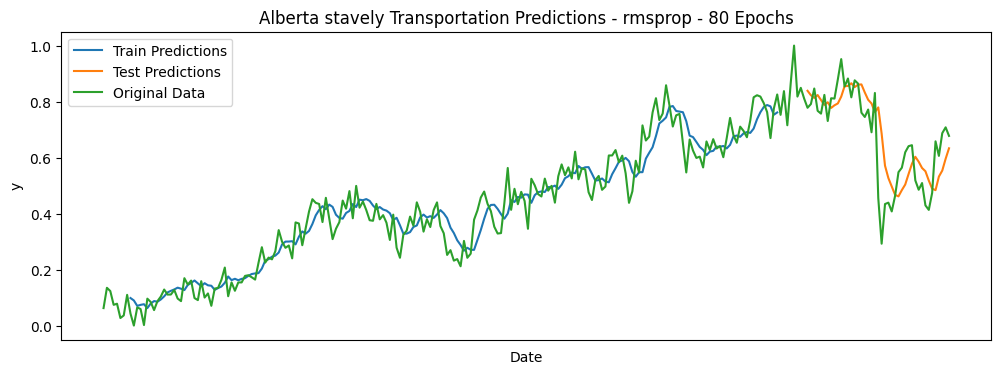

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.08213412667145861
Test MSE: 0.04857689408932816
Train MAE: 0.0463907380161289
Test MAE: 0.08400444092890873
Train RMSE: 0.05962571462945374
Test RMSE: 0.11123272725886393
2/2 [==============================] - 0s 20ms/step


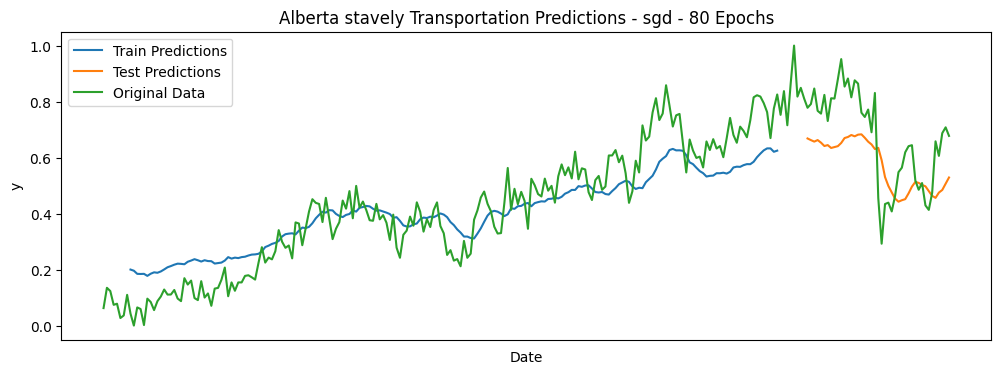

Metrics for sgd - 80 Epochs:
Train MSE: 0.05940227800740686
Test MSE: 0.043874122470823916
Train MAE: 0.081352508667303
Test MAE: 0.13254351315417964
Train RMSE: 0.09761249608770538
Test RMSE: 0.15125896753371657
2/2 [==============================] - 0s 16ms/step


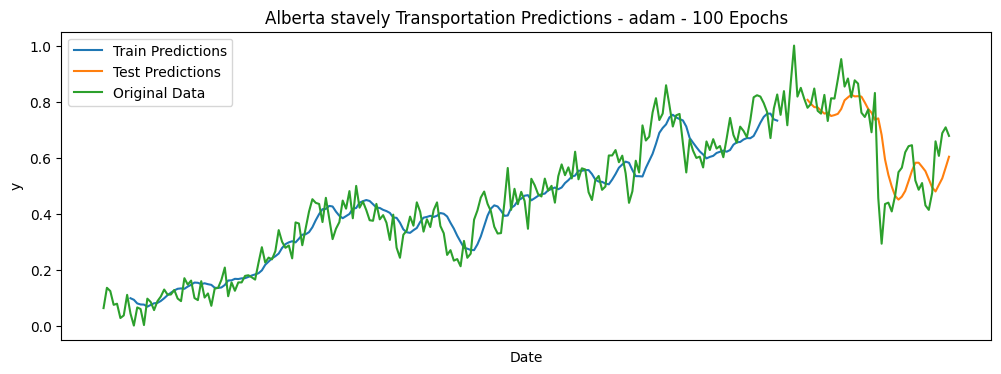

Metrics for adam - 100 Epochs:
Train MSE: 0.0792932603398611
Test MSE: 0.04481471419895903
Train MAE: 0.04958368136889232
Test MAE: 0.08955978696057122
Train RMSE: 0.06383854594952976
Test RMSE: 0.11561801432413023
2/2 [==============================] - 0s 14ms/step


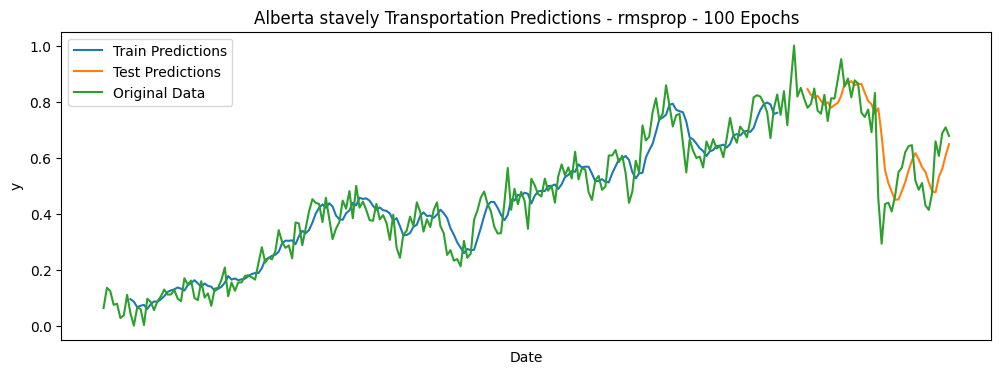

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.08287271070201287
Test MSE: 0.049400093486749556
Train MAE: 0.04588215204646984
Test MAE: 0.08175647823950799
Train RMSE: 0.05902342653072918
Test RMSE: 0.10904294175663638
2/2 [==============================] - 0s 16ms/step


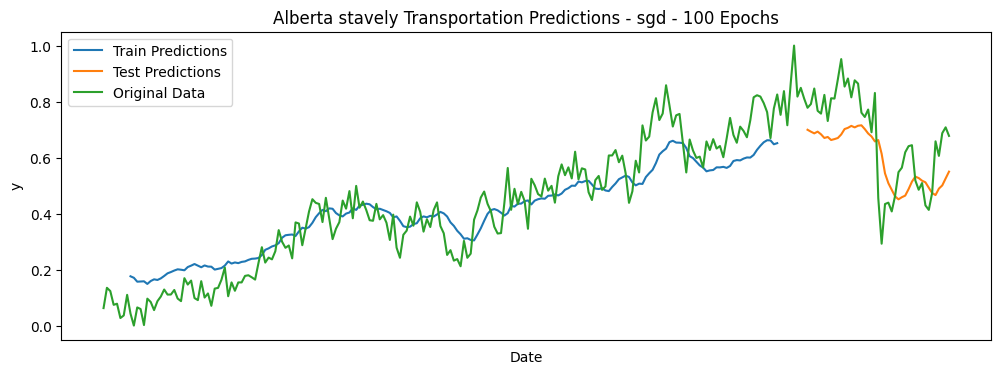

Metrics for sgd - 100 Epochs:
Train MSE: 0.06343231385205295
Test MSE: 0.04180834788081971
Train MAE: 0.07081879790402901
Test MAE: 0.11717944979662887
Train RMSE: 0.08573130712654117
Test RMSE: 0.13635279918008236
2/2 [==============================] - 0s 7ms/step


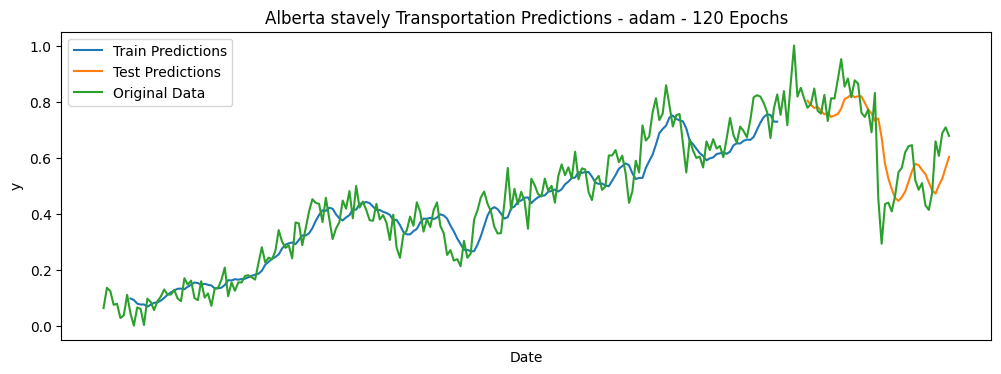

Metrics for adam - 120 Epochs:
Train MSE: 0.07883750896896362
Test MSE: 0.04550622697128962
Train MAE: 0.04961244448491019
Test MAE: 0.0880249257591905
Train RMSE: 0.06371200951240116
Test RMSE: 0.11389073089575293
2/2 [==============================] - 0s 9ms/step


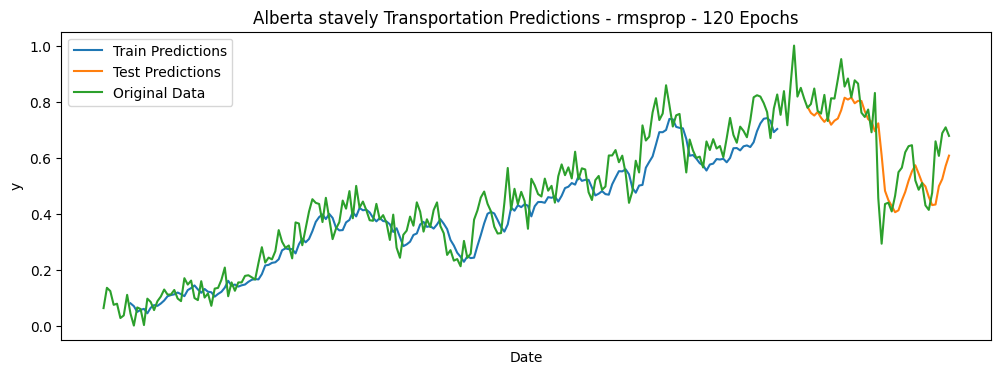

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.07942898539773527
Test MSE: 0.04867284641649031
Train MAE: 0.05348460460686641
Test MAE: 0.0834750986795314
Train RMSE: 0.06796711408954956
Test RMSE: 0.1089740639624515
2/2 [==============================] - 0s 10ms/step


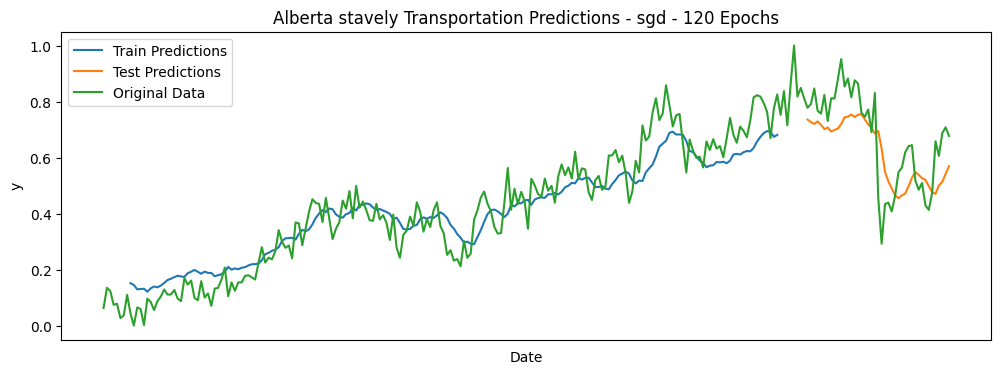

Metrics for sgd - 120 Epochs:
Train MSE: 0.06828041418083755
Test MSE: 0.041871477616702166
Train MAE: 0.061164962313487
Test MAE: 0.10106545132764669
Train RMSE: 0.07497523238037697
Test RMSE: 0.12276075965325933


In [32]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_transportation_stavely.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_transportation_stavely.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_transportation_stavely.index, lstm_transportation_stavely['Transportation'], label='Original Data')
        plt.title(f'Alberta stavely Transportation Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Transportation'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Transportation'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

# Milk River Agriculture

In [33]:
lstm_agriculture_Milkriver = lstm['Agriculture'][lstm['Station Name'] == 'Milk River']

In [34]:
lstm_agriculture_Milkriver.index = pd.to_datetime(lstm_agriculture_Milkriver.index)

In [35]:
lstm_agriculture_Milkriver = lstm_agriculture_Milkriver.to_frame(name='Agriculture')

In [36]:
lstm_agriculture_Milkriver['Agriculture'].head()


1970-01-01 00:00:00.000004536    7.069979
1970-01-01 00:00:00.000004537    7.369142
1970-01-01 00:00:00.000004538    7.321915
1970-01-01 00:00:00.000004539    7.673358
1970-01-01 00:00:00.000004540    7.564151
Name: Agriculture, dtype: float64

In [37]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [38]:
sequence_length = 11
X, y = create_sequences(lstm_agriculture_Milkriver['Agriculture'].values, sequence_length)

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [41]:
n_steps =11
n_features =1

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [43]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

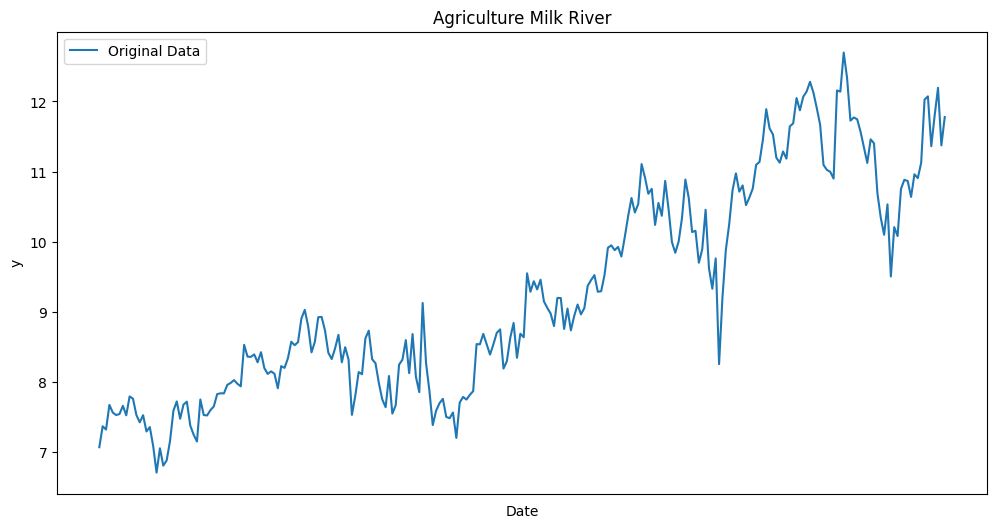

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_agriculture_Milkriver.index, lstm_agriculture_Milkriver['Agriculture'], label='Original Data')
plt.title('Agriculture Milk River')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [45]:
#Scaling the data
scaler = MinMaxScaler()
lstm_agriculture_Milkriver[['Agriculture']] = scaler.fit_transform(lstm_agriculture_Milkriver[['Agriculture']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_agriculture_Milkriver) * 0.8)
train, test = lstm_agriculture_Milkriver[:train_size], lstm_agriculture_Milkriver[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Agriculture'].values, sequence_length)
X_test, y_test = create_sequences(test['Agriculture'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

2/2 [==============================] - 0s 16ms/step


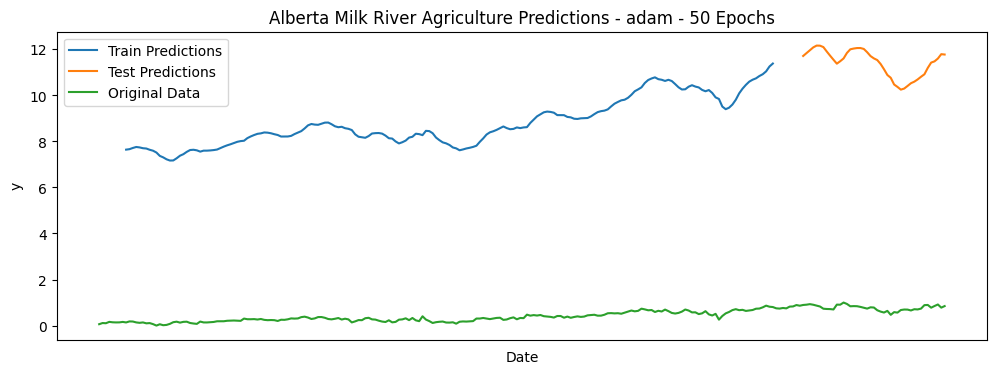

Metrics for adam - 50 Epochs:
Train MSE: 72.2106955127712
Test MSE: 113.61263969438355
Train MAE: 8.43307237239246
Test MAE: 10.642144617902595
Train RMSE: 8.47588600439679
Test RMSE: 10.65507501818915
2/2 [==============================] - 0s 693us/step


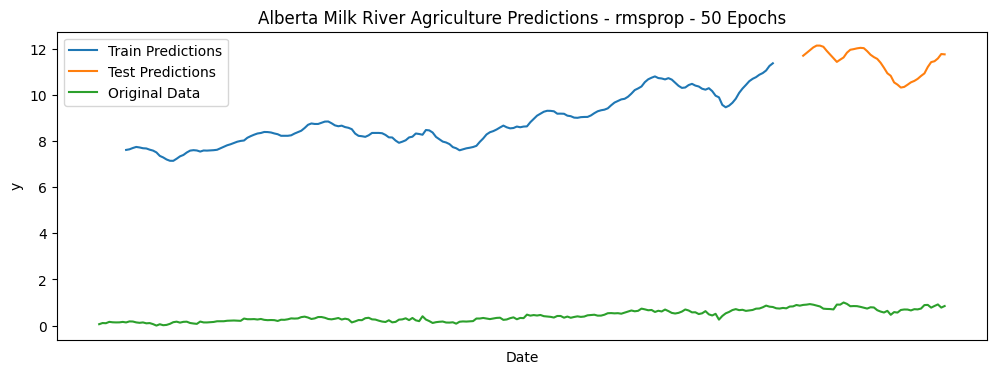

Metrics for rmsprop - 50 Epochs:
Train MSE: 72.34149803579308
Test MSE: 113.71202159273889
Train MAE: 8.439057197566267
Test MAE: 10.648063564279662
Train RMSE: 8.483320831200684
Test RMSE: 10.659966361604521
2/2 [==============================] - 0s 8ms/step


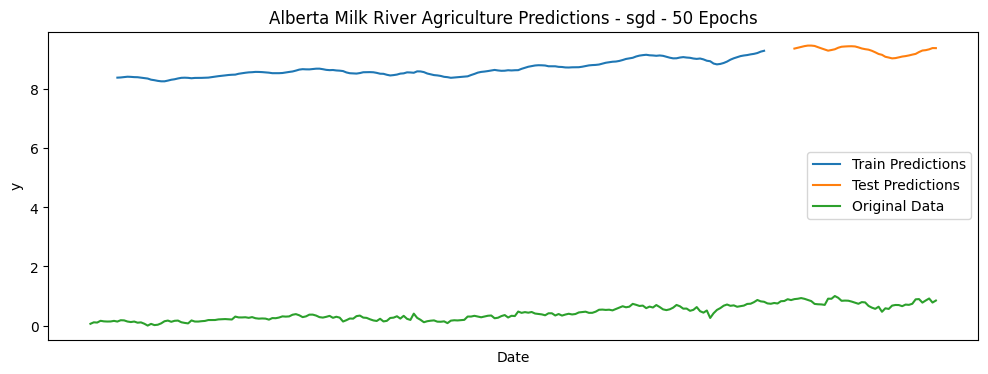

Metrics for sgd - 50 Epochs:
Train MSE: 69.43549605417165
Test MSE: 72.7899826657078
Train MAE: 8.326723274760086
Test MAE: 8.529836714524087
Train RMSE: 8.327315518629478
Test RMSE: 8.530627803309244
2/2 [==============================] - 0s 21ms/step


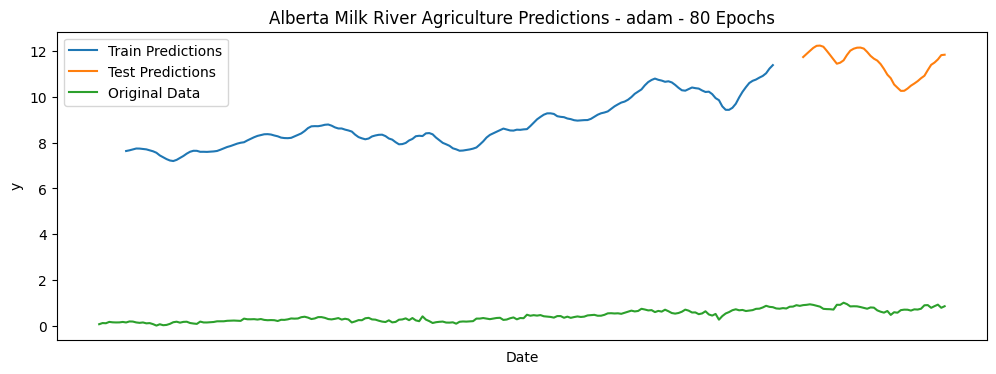

Metrics for adam - 80 Epochs:
Train MSE: 72.10745463582316
Test MSE: 114.76864558896445
Train MAE: 8.426909504129886
Test MAE: 10.69485690314401
Train RMSE: 8.469921743380157
Test RMSE: 10.709242032329648
2/2 [==============================] - 0s 8ms/step


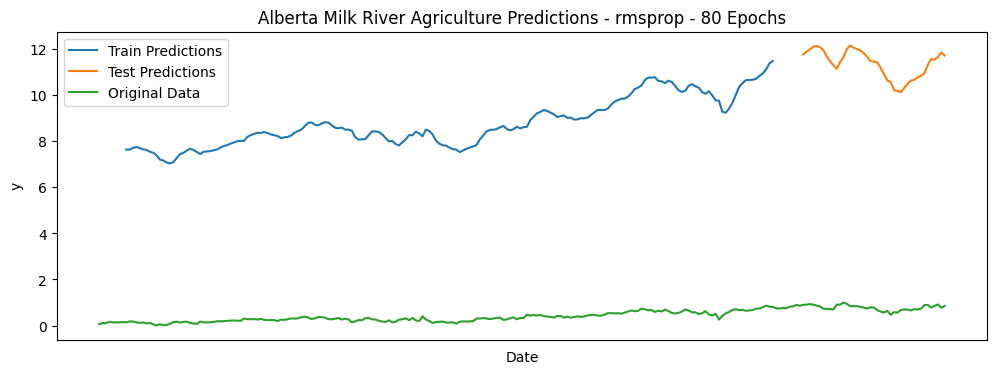

Metrics for rmsprop - 80 Epochs:
Train MSE: 71.928577554242
Test MSE: 112.17974192742766
Train MAE: 8.413833823817171
Test MAE: 10.573828712708645
Train RMSE: 8.458575658763243
Test RMSE: 10.586860755449155
2/2 [==============================] - 0s 0s/step


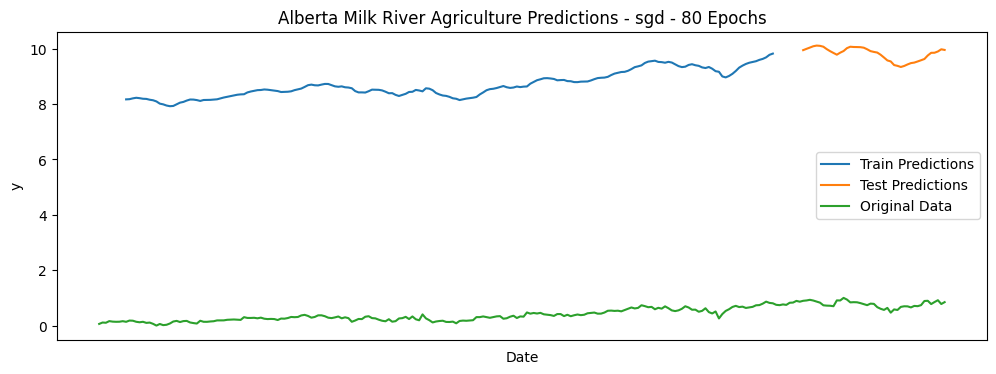

Metrics for sgd - 80 Epochs:
Train MSE: 69.92161652677481
Test MSE: 81.83782346094965
Train MAE: 8.346896868884045
Test MAE: 9.04261963199036
Train RMSE: 8.351911950164594
Test RMSE: 9.044493423317041
2/2 [==============================] - 0s 11ms/step


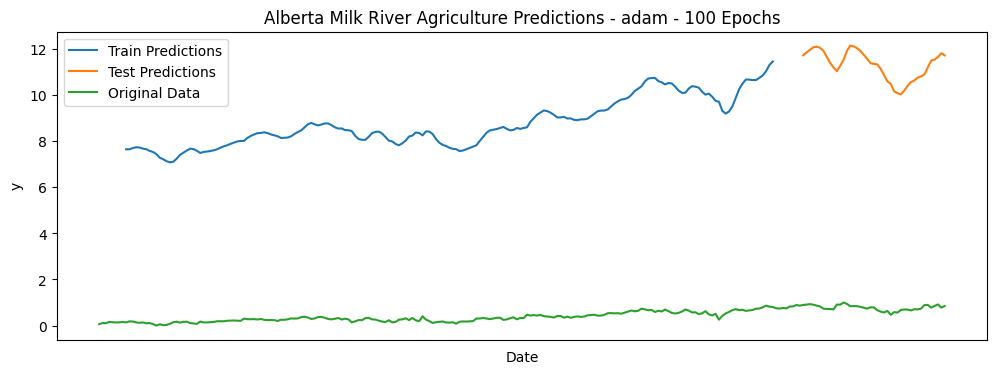

Metrics for adam - 100 Epochs:
Train MSE: 71.56029093225627
Test MSE: 111.15794048802874
Train MAE: 8.394522600811788
Test MAE: 10.524281206775461
Train RMSE: 8.437322959238433
Test RMSE: 10.538437575437118
2/2 [==============================] - 0s 0s/step


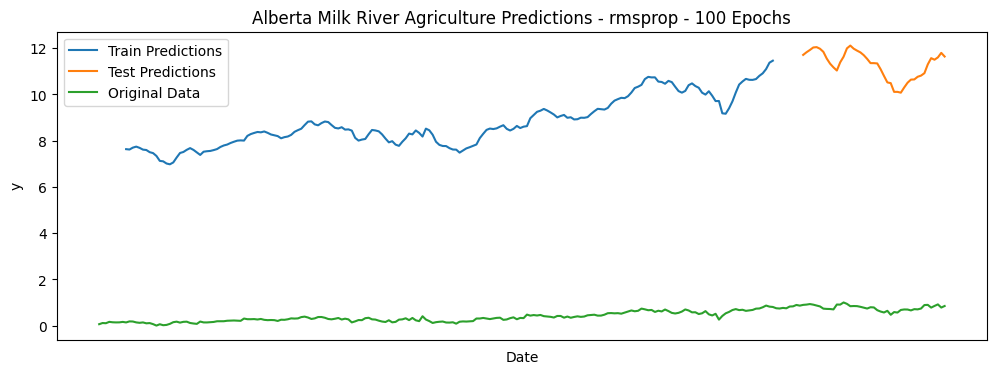

Metrics for rmsprop - 100 Epochs:
Train MSE: 71.85551787258945
Test MSE: 110.93958521791525
Train MAE: 8.409170751715362
Test MAE: 10.515561385466526
Train RMSE: 8.454142450040013
Test RMSE: 10.52802832745045
2/2 [==============================] - 0s 12ms/step


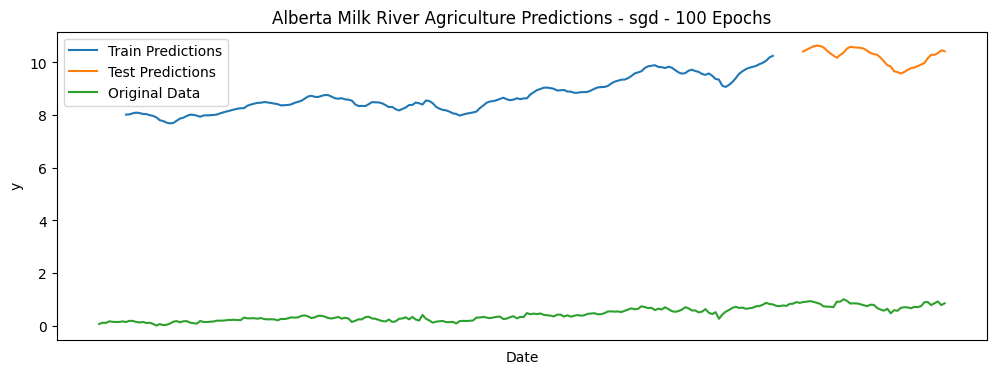

Metrics for sgd - 100 Epochs:
Train MSE: 70.4937426551471
Test MSE: 89.57819931411314
Train MAE: 8.37077688859081
Test MAE: 9.458409103106538
Train RMSE: 8.38264461235237
Test RMSE: 9.462003394646484
2/2 [==============================] - 0s 0s/step


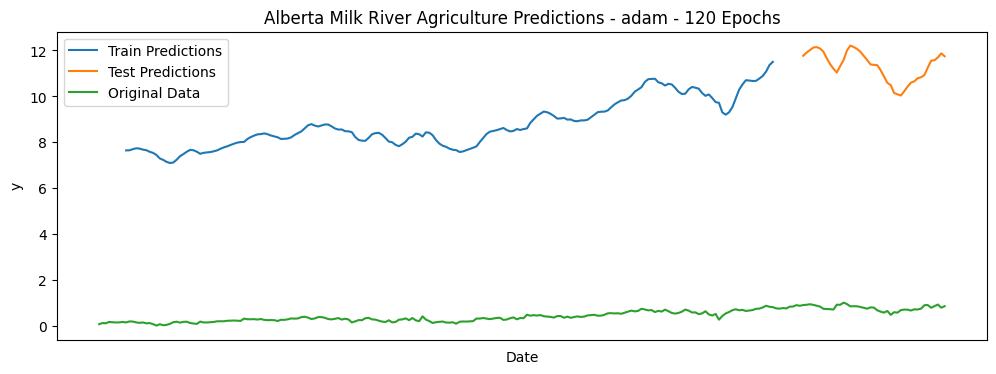

Metrics for adam - 120 Epochs:
Train MSE: 71.7673103666861
Test MSE: 111.97846871193718
Train MAE: 8.405744889210332
Test MAE: 10.56238049571589
Train RMSE: 8.44938175602785
Test RMSE: 10.577107425871931
2/2 [==============================] - 0s 16ms/step


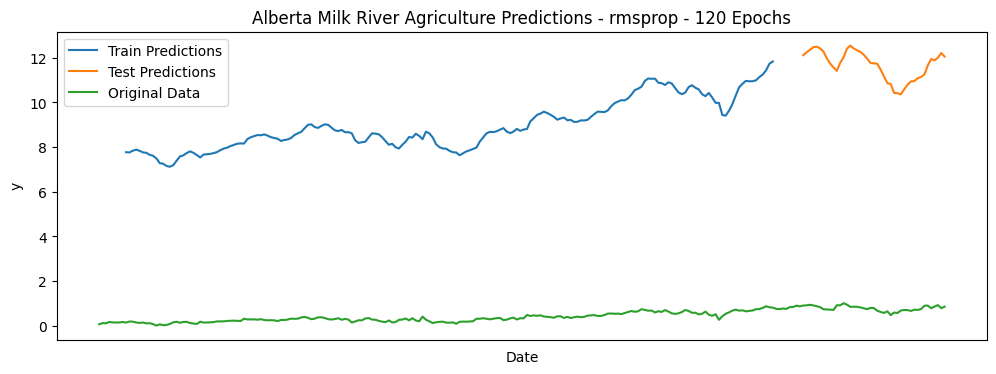

Metrics for rmsprop - 120 Epochs:
Train MSE: 75.3401272913199
Test MSE: 119.20074812570198
Train MAE: 8.606651704516842
Test MAE: 10.898585534629351
Train RMSE: 8.656590028449036
Test RMSE: 10.913017540921572
2/2 [==============================] - 0s 12ms/step


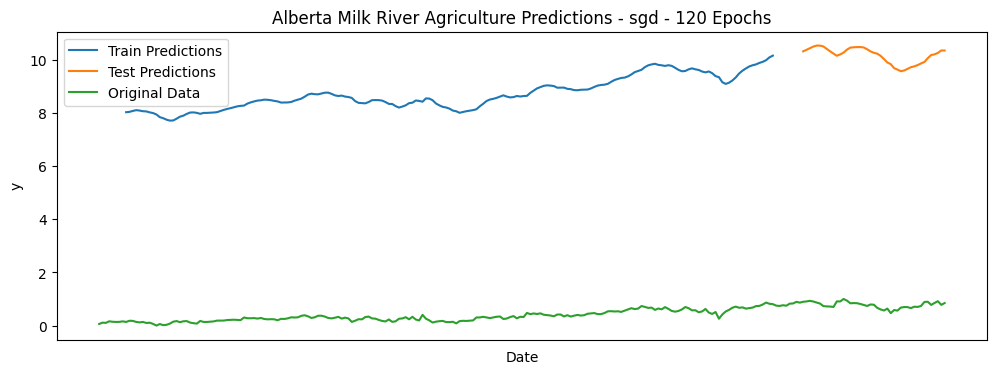

Metrics for sgd - 120 Epochs:
Train MSE: 70.30526961572053
Test MSE: 88.14818850997514
Train MAE: 8.361069837970845
Test MAE: 9.383366777709668
Train RMSE: 8.37191529247603
Test RMSE: 9.386521724659097


In [46]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_agriculture_Milkriver.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_agriculture_Milkriver.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_agriculture_Milkriver.index, lstm_agriculture_Milkriver['Agriculture'], label='Original Data')
        plt.title(f'Alberta Milk River Agriculture Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Agriculture'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Agriculture'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')